In [1]:
import time
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
def random_array(n):
    array = []
    for i in range(0,n,1):
        array.append(np.random.randint(0,100))
    return array

## 1. BubbleSort

In [3]:
# adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheBubbleSort.html
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):   # loop over array from last to first. After the first pass the largest number will be in the last position. Each successive loop will be shorter as the largest number will be at the end and the loop decrements.
        for i in range(passnum): # loop from first to last swapping number with the one after it if first number is greater.
            if alist[i]>alist[i+1]: # Compare item at postion i with item at position i+1
                alist[i], alist[i+1] = alist[i+1], alist[i] # Swap the two items if above condtion is matched


In [164]:
#cols = ['n=100','n=250','n=500','n=750','n=1000','n=1250','n=2500','n=3750','n=5000','n=6250','n=7500','n=8750','n=10000']
#cols = ['n=100','n=250','n=500','n=750','n=1000','n=1250','n=2500']
cols = ['bubble','merge','counting','insertion','selection','n']
indexes = [0,1,2,3,4]
times_df =  pd.DataFrame(columns=cols,index=indexes)
times_df

,bubble,merge,counting,insertion,selection,n
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
#array_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]
array_size = [100, 250, 500, 750, 1000]


for i in range(0,len(array_size)):
    total_time = 0
    print("array size: " + str(array_size[i]))
    for j in range(10):
        my_array = random_array(array_size[i])
        start_time = time.time()
        bubbleSort(my_array)
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        print('Run number ' + str(j) + ' ', time_elapsed)
        total_time += time_elapsed
    print('Total time: ', total_time)
    
    times_df.iat[i,0] = round((total_time/10),3)
    times_df.iat[i,5] = array_size[i]
    print('Avg: ', times_df.iat[i,0])
    
    
    
times_df


array size: 100
Run number 0  0.001627206802368164
Run number 1  0.0013370513916015625
Run number 2  0.0012559890747070312
Run number 3  0.001127004623413086
Run number 4  0.0011723041534423828
Run number 5  0.0011444091796875
Run number 6  0.006824016571044922
Run number 7  0.0012390613555908203
Run number 8  0.0035560131072998047
Run number 9  0.0011379718780517578
Total time:  0.02042102813720703
Avg:  0.002
array size: 250
Run number 0  0.014873981475830078
Run number 1  0.017999887466430664
Run number 2  0.014123678207397461
Run number 3  0.01967763900756836
Run number 4  0.016696929931640625
Run number 5  0.01308131217956543
Run number 6  0.015473365783691406
Run number 7  0.022303104400634766
Run number 8  0.020200014114379883
Run number 9  0.014179706573486328
Total time:  0.168609619140625
Avg:  0.017
array size: 500
Run number 0  0.07571792602539062
Run number 1  0.08199572563171387
Run number 2  0.059273719787597656
Run number 3  0.07303667068481445
Run number 4  0.076195478

,bubble,merge,counting,insertion,selection,n
0,0.002,NaN,NaN,NaN,NaN,100
1,0.017,NaN,NaN,NaN,NaN,250
2,0.068,NaN,NaN,NaN,NaN,500
3,0.098,NaN,NaN,NaN,NaN,750
4,0.199,NaN,NaN,NaN,NaN,1000


## 2. MergeSort

In [166]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheMergeSort.html
def mergeSort(alist):
    #print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    #print("Merging ",alist)


In [167]:
#array_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

array_size = [100, 250, 500, 750, 1000]

for i in range(0,len(array_size)):
    total_time = 0
    print("array size: " + str(array_size[i]))
    for j in range(10):
        my_array = random_array(array_size[i])
        start_time = time.time()
        mergeSort(my_array)
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        print('Run number ' + str(j) + ' ', time_elapsed)
        total_time += time_elapsed
        #print(my_array)
    print('Total time: ', total_time)
    
    times_df.iat[i,1] = round((total_time/10),3)
    print('Avg: ', times_df.iat[i,1])
    
    
    
times_df

array size: 100
Run number 0  0.0005457401275634766
Run number 1  0.0005691051483154297
Run number 2  0.0005040168762207031
Run number 3  0.000392913818359375
Run number 4  0.00040793418884277344
Run number 5  0.0003879070281982422
Run number 6  0.0003345012664794922
Run number 7  0.007594108581542969
Run number 8  0.00034117698669433594
Run number 9  0.000339508056640625
Total time:  0.011416912078857422
Avg:  0.001
array size: 250
Run number 0  0.001344442367553711
Run number 1  0.004358530044555664
Run number 2  0.0010530948638916016
Run number 3  0.001486063003540039
Run number 4  0.0011525154113769531
Run number 5  0.001155853271484375
Run number 6  0.0010223388671875
Run number 7  0.005008697509765625
Run number 8  0.00576472282409668
Run number 9  0.001155853271484375
Total time:  0.023502111434936523
Avg:  0.002
array size: 500
Run number 0  0.007430553436279297
Run number 1  0.006805896759033203
Run number 2  0.007514238357543945
Run number 3  0.0026352405548095703
Run number 

,bubble,merge,counting,insertion,selection,n
0,0.002,0.001,NaN,NaN,NaN,100
1,0.017,0.002,NaN,NaN,NaN,250
2,0.068,0.005,NaN,NaN,NaN,500
3,0.098,0.008,NaN,NaN,NaN,750
4,0.199,0.011,NaN,NaN,NaN,1000


## 3. CountingSort

In [21]:
# Adapted from https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def countingSort(array1):
    m = len(array1) 
    count = [0] * m   # make an array with m elements containing 0             
    
    for a in array1: # itareate over the array to be sorted
    # count occurences of a and increment the count array element for that a
        count[a] += 1             
    i = 0
    for a in range(m):    # iterate over values of the array to be counted        
        for c in range(count[a]):  # fill the array to be counted with count[a] times value a 
            array1[i] = a
            i += 1
    return array1

In [168]:
#array_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

array_size = [100,250,500,750,1000]

for i in range(0,len(array_size)):
    total_time = 0
    print("array size: " + str(array_size[i]))
    for j in range(10):
        my_array = random_array(array_size[i])
        start_time = time.time()
        res = countingSort(my_array)
        finish_time = time.time()
        #print(res)
        time_elapsed = finish_time - start_time
        print('Run number ' + str(j) + ' ', time_elapsed)
        total_time += time_elapsed
        #print(my_array)
    print('Total time: ', total_time)
    
    times_df.iat[i,2] = round((total_time/10),3)
    print('Avg: ', times_df.iat[i,2])
    
    
    
times_df

array size: 100
Run number 0  5.1021575927734375e-05
Run number 1  4.601478576660156e-05
Run number 2  5.91278076171875e-05
Run number 3  6.175041198730469e-05
Run number 4  4.2438507080078125e-05
Run number 5  4.267692565917969e-05
Run number 6  4.220008850097656e-05
Run number 7  4.506111145019531e-05
Run number 8  5.4836273193359375e-05
Run number 9  4.553794860839844e-05
Total time:  0.0004906654357910156
Avg:  0.0
array size: 250
Run number 0  9.703636169433594e-05
Run number 1  9.560585021972656e-05
Run number 2  0.00010251998901367188
Run number 3  9.894371032714844e-05
Run number 4  0.00011682510375976562
Run number 5  0.0002396106719970703
Run number 6  0.00010824203491210938
Run number 7  0.00015306472778320312
Run number 8  0.00016546249389648438
Run number 9  0.00013899803161621094
Total time:  0.0013163089752197266
Avg:  0.0
array size: 500
Run number 0  0.0001850128173828125
Run number 1  0.00018644332885742188
Run number 2  0.0030014514923095703
Run number 3  0.000186681

,bubble,merge,counting,insertion,selection,n
0,0.002,0.001,0,NaN,NaN,100
1,0.017,0.002,0,NaN,NaN,250
2,0.068,0.005,0.001,NaN,NaN,500
3,0.098,0.008,0.001,NaN,NaN,750
4,0.199,0.011,0,NaN,NaN,1000


In [33]:
total_time = 0
for j in range(10):
    my_array = random_array(500000)
    start_time = time.time()
    countingSort(my_array)
    finish_time = time.time()
    time_elapsed = finish_time - start_time
    print('Run number ' + str(j) + ' ', time_elapsed)
    total_time += time_elapsed
    print('Total time: ', total_time)
    
print('Avg time: ' , round((total_time/10),3))

Run number 0  0.2358253002166748
Total time:  0.2358253002166748
Run number 1  0.24445438385009766
Total time:  0.48027968406677246
Run number 2  0.23220014572143555
Total time:  0.712479829788208
Run number 3  0.22913908958435059
Total time:  0.9416189193725586
Run number 4  0.23070168495178223
Total time:  1.1723206043243408
Run number 5  0.22971510887145996
Total time:  1.4020357131958008
Run number 6  0.23392271995544434
Total time:  1.6359584331512451
Run number 7  0.22509193420410156
Total time:  1.8610503673553467
Run number 8  0.24017906188964844
Total time:  2.101229429244995
Run number 9  0.22684741020202637
Total time:  2.3280768394470215
Avg time:  0.233


## 4. InsertionSort

In [35]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheInsertionSort.html
def insertionSort(alist):
   for index in range(1,len(alist)): # Assume 1st element is sorted, so iterate from 1 to end of array

     currentvalue = alist[index]
     position = index

     while position>0 and alist[position-1]>currentvalue: # This loop will compare  current position against all previous elements and swap them if current position is less than previous element, until postion is 0.
         alist[position]=alist[position-1] # swap with previous element if loop condition met
         position = position-1 # decrement position , so in next loop it will now be compared with previous element

     alist[position]=currentvalue # Second part of the swap (if swapping) or just assigning the same value if not swapping




In [169]:
#array_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

array_size = [100,250,500,750,1000]

for i in range(0,len(array_size)):
    total_time = 0
    print("array size: " + str(array_size[i]))
    for j in range(10):
        my_array = random_array(array_size[i])
        start_time = time.time()
        insertionSort(my_array)
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        print('Run number ' + str(j) + ' ', time_elapsed)
        total_time += time_elapsed
        #print(my_array)
    print('Total time: ', total_time)
    
    times_df.iat[i,3] = round((total_time/10),3)
    print('Avg: ', times_df.iat[i,3])
    
    
    
times_df

array size: 100
Run number 0  0.001634836196899414
Run number 1  0.0004971027374267578
Run number 2  0.004717588424682617
Run number 3  0.0005810260772705078
Run number 4  0.0004961490631103516
Run number 5  0.001558065414428711
Run number 6  0.0005218982696533203
Run number 7  0.0004901885986328125
Run number 8  0.0005986690521240234
Run number 9  0.0005497932434082031
Total time:  0.011645317077636719
Avg:  0.001
array size: 250
Run number 0  0.009915590286254883
Run number 1  0.008207321166992188
Run number 2  0.013674736022949219
Run number 3  0.003804922103881836
Run number 4  0.008994817733764648
Run number 5  0.014271259307861328
Run number 6  0.003604888916015625
Run number 7  0.007552385330200195
Run number 8  0.01225733757019043
Run number 9  0.008359193801879883
Total time:  0.09064245223999023
Avg:  0.009
array size: 500
Run number 0  0.03651571273803711
Run number 1  0.03715944290161133
Run number 2  0.036054372787475586
Run number 3  0.03336739540100098
Run number 4  0.03

,bubble,merge,counting,insertion,selection,n
0,0.002,0.001,0,0.001,NaN,100
1,0.017,0.002,0,0.009,NaN,250
2,0.068,0.005,0.001,0.037,NaN,500
3,0.098,0.008,0.001,0.075,NaN,750
4,0.199,0.011,0,0.156,NaN,1000


## 5. SelectionSort

In [37]:
# Adapted from https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html
def selectionSort(alist):
   for fillslot in range(len(alist)-1,0,-1):
       positionOfMax=0
       for location in range(1,fillslot+1):
           if alist[location]>alist[positionOfMax]:
               positionOfMax = location

       temp = alist[fillslot]
       alist[fillslot] = alist[positionOfMax]
       alist[positionOfMax] = temp



In [170]:
#array_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

array_size = [100,250,500,750,1000]

for i in range(0,len(array_size)):
    total_time = 0
    print("array size: " + str(array_size[i]))
    for j in range(10):
        my_array = random_array(array_size[i])
        start_time = time.time()
        selectionSort(my_array)
        finish_time = time.time()
        time_elapsed = finish_time - start_time
        print('Run number ' + str(j) + ' ', time_elapsed)
        total_time += time_elapsed
        #print(my_array)
    print('Total time: ', total_time)
    
    times_df.iat[i,4] = round((total_time/10),3)
    print('Avg: ', times_df.iat[i,4])
    
    
    
times_df

array size: 100
Run number 0  0.0009038448333740234
Run number 1  0.0005435943603515625
Run number 2  0.0006642341613769531
Run number 3  0.005380868911743164
Run number 4  0.0005748271942138672
Run number 5  0.0006735324859619141
Run number 6  0.0005290508270263672
Run number 7  0.0005781650543212891
Run number 8  0.0006744861602783203
Run number 9  0.0007662773132324219
Total time:  0.011288881301879883
Avg:  0.001
array size: 250
Run number 0  0.00745391845703125
Run number 1  0.00969839096069336
Run number 2  0.0032837390899658203
Run number 3  0.015871524810791016
Run number 4  0.008264780044555664
Run number 5  0.003275632858276367
Run number 6  0.006083250045776367
Run number 7  0.007756471633911133
Run number 8  0.009593486785888672
Run number 9  0.006356954574584961
Total time:  0.07763814926147461
Avg:  0.008
array size: 500
Run number 0  0.03584766387939453
Run number 1  0.03334212303161621
Run number 2  0.03269839286804199
Run number 3  0.02743697166442871
Run number 4  0.0

,bubble,merge,counting,insertion,selection,n
0,0.002,0.001,0,0.001,0.001,100
1,0.017,0.002,0,0.009,0.008,250
2,0.068,0.005,0.001,0.037,0.03,500
3,0.098,0.008,0.001,0.075,0.069,750
4,0.199,0.011,0,0.156,0.124,1000


In [171]:
times_df['n'] = times_df['n'].astype(float)
times_df['bubble'] = times_df['bubble'].astype(float)
times_df['merge'] = times_df['merge'].astype(float)
times_df['counting'] = times_df['counting'].astype(float)
times_df['insertion'] = times_df['insertion'].astype(float)
times_df['selection'] = times_df['selection'].astype(float)

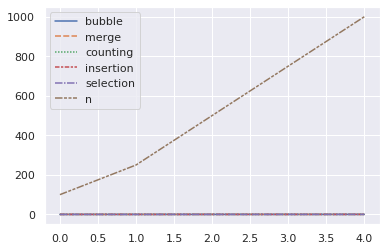

In [172]:
sns.lineplot(data=times_df)

In [ ]:
def countingSortStable(array1):
    m = len(array1) 
    count = [0] * m   # make an array with m elements containing 0             
    
    for a in array1: # iterate over the array to be sorted
        count[a] += 1    # add 1 to count array at index a. This will be done for every value a in the original array
    for i in range(1,len(count)): # Transform the count array such that count[i] will contain how many elements are <= i.
        count[i] = count[i] + count[i - 1] # So that when we iterate backwards through original array, we know how many elements go before it
    
    return array1 # return the sorted array

In [82]:
arr1 = random_array(10)
arr1

[28, 58, 48, 43, 75, 11, 36, 9, 25, 71]

In [83]:
count = [0]* 100

In [84]:
len(arr1)

10

In [85]:
for a in arr1:
    count[a] += 1

count

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [86]:
len(count)

100

In [87]:
for i in range(1,len(count)):
    count[i] = count[i] + count[i - 1]

count

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [121]:
def countingSortStable(arr1):
    print(arr1)
    count = [0]* 100
    for a in arr1:
        count[a] += 1
    print(count)

    for i in range(1,len(count)):
        count[i] = count[i] + count[i - 1]

    print(count)

    result = [0] * len(arr1)
    for i in range(len(arr1),0,-1):
        j = arr1[i - 1]
        count[j] = count[j] -1
        res = count[j]
        result[res] = j

    return result

x = countingSortStable(random_array(100))

[9, 41, 48, 93, 91, 7, 40, 82, 83, 61, 76, 36, 86, 99, 29, 17, 46, 70, 81, 42, 60, 20, 15, 79, 99, 85, 0, 57, 12, 26, 97, 0, 32, 37, 96, 95, 71, 57, 14, 85, 18, 94, 3, 25, 74, 69, 67, 79, 37, 43, 61, 36, 62, 96, 45, 77, 52, 45, 81, 91, 78, 94, 23, 56, 44, 49, 54, 74, 78, 0, 65, 62, 17, 29, 96, 9, 48, 49, 95, 75, 32, 77, 43, 34, 55, 37, 90, 66, 92, 54, 79, 69, 93, 50, 15, 21, 62, 51, 40, 85]
[3, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 3, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 3, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 3, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 3, 1, 0, 2]
[3, 3, 3, 4, 4, 4, 4, 5, 5, 7, 7, 7, 8, 8, 9, 11, 11, 13, 14, 14, 15, 16, 16, 17, 17, 18, 19, 19, 19, 21, 21, 21, 23, 23, 24, 24, 26, 29, 29, 29, 31, 32, 33, 35, 36, 38, 39, 39, 41, 43, 44, 45, 46, 46, 48, 49, 50, 52, 52, 52, 53, 55, 58, 58, 58, 59, 60, 61, 61, 63, 64, 65, 65, 65, 67, 68, 69, 71, 73, 76,

In [122]:
x

[0,
 0,
 0,
 3,
 7,
 9,
 9,
 12,
 14,
 15,
 15,
 17,
 17,
 18,
 20,
 21,
 23,
 25,
 26,
 29,
 29,
 32,
 32,
 34,
 36,
 36,
 37,
 37,
 37,
 40,
 40,
 41,
 42,
 43,
 43,
 44,
 45,
 45,
 46,
 48,
 48,
 49,
 49,
 50,
 51,
 52,
 54,
 54,
 55,
 56,
 57,
 57,
 60,
 61,
 61,
 62,
 62,
 62,
 65,
 66,
 67,
 69,
 69,
 70,
 71,
 74,
 74,
 75,
 76,
 77,
 77,
 78,
 78,
 79,
 79,
 79,
 81,
 81,
 82,
 83,
 85,
 85,
 85,
 86,
 90,
 91,
 91,
 92,
 93,
 93,
 94,
 94,
 95,
 95,
 96,
 96,
 96,
 97,
 99,
 99]

In [114]:
x.sort()
x

[1, 4, 30, 35, 35, 55, 83, 90, 91, 95]

In [35]:
len(count_transform)

101

In [54]:
result = [0] * len(arr1)
result

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [92]:
count[71] 

9

In [67]:
arr1[9]

39

In [88]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1


In [91]:
arr1

[28, 58, 48, 43, 75, 11, 36, 9, 25, 71]

In [95]:
j = arr1[9]
j

71

In [96]:
count[j]

9

In [97]:
count[j] = count[j] -1 
count[j]

8

In [98]:
res = count[j]

In [99]:
res

8

In [101]:
result[res] = j
result[res]

71